In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# read video as secuence of frames
cap = cv2.VideoCapture('60fps.mp4')
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

In [3]:
frames[0].shape

(636, 1280, 3)

In [4]:
# for every frame, resize it to 64x64
size = (128, 64)
resized_frames = []
for frame in frames:
    resized_frames.append(cv2.resize(frame, size))
    
frames = np.array(resized_frames)

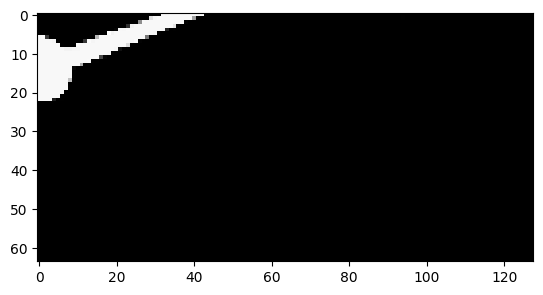

In [5]:
frames = np.mean(frames, axis=3)
plt.imshow(frames[0], cmap="gray")

In [6]:
frames.shape

(262, 64, 128)

In [7]:
columns = []
for frame in frames:
    columns.append(frame.flatten())
M = np.array(columns).T

In [8]:
U, s, V = np.linalg.svd(M, full_matrices=False)

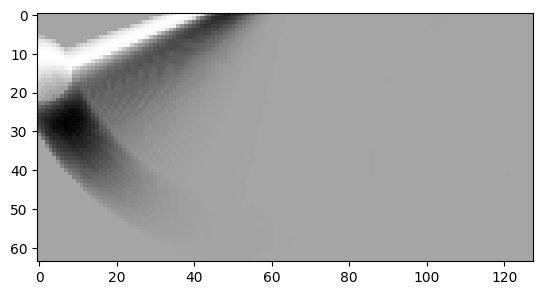

In [19]:
modo_1 = U.T[2].reshape(64, 128)
plt.imshow(modo_1, cmap="gray")

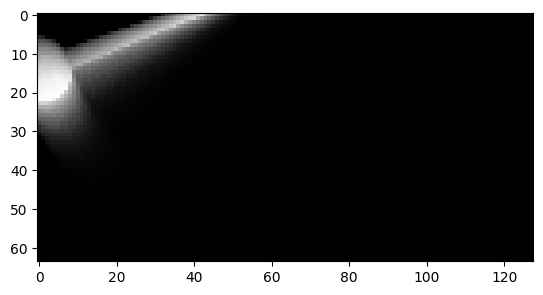

In [10]:
modo_1 = U.T[0].reshape(64, 128)
plt.imshow(modo_1, cmap="gray")

In [20]:
# reconstruct the image using the first 
n = 2
reconstructed = U[:, :n] @ np.diag(s[:n]) @ V[:n, :]

In [21]:
frames_reconstructed = []
for row in reconstructed.T:
    frames_reconstructed.append(row.reshape(64, 128))

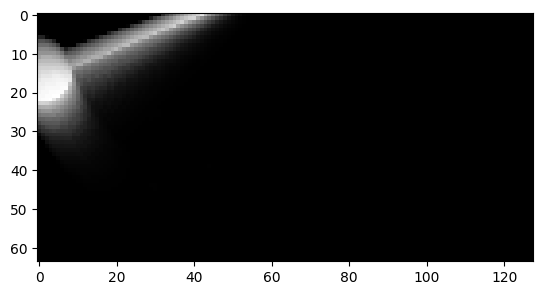

In [23]:
plt.imshow(frames_reconstructed[0], cmap="gray")

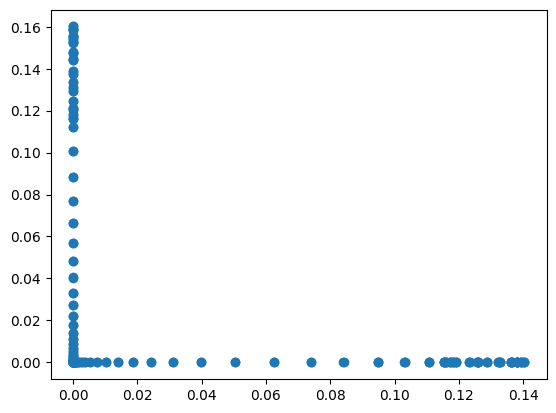

In [24]:
xs, ys = V[:2]
plt.scatter(xs, ys)

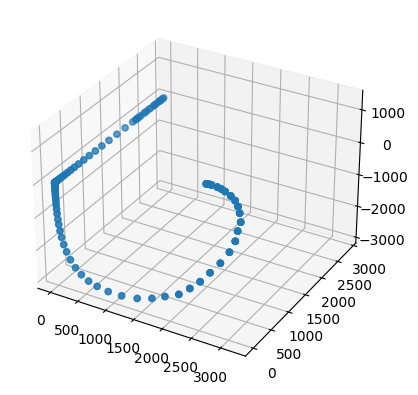

In [25]:
# plot 3d
xs, ys, zs = np.diag(s[:3])@V[:3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
plt.show()

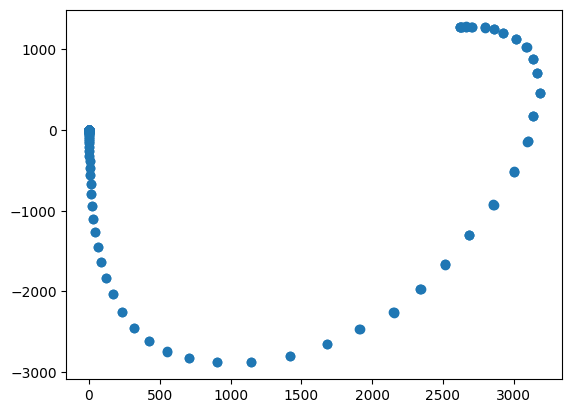

In [16]:
plt.scatter(xs, zs)